In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering

In [2]:
df=pd.read_csv('/Users/bonnyma/Downloads/Customer_Data.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


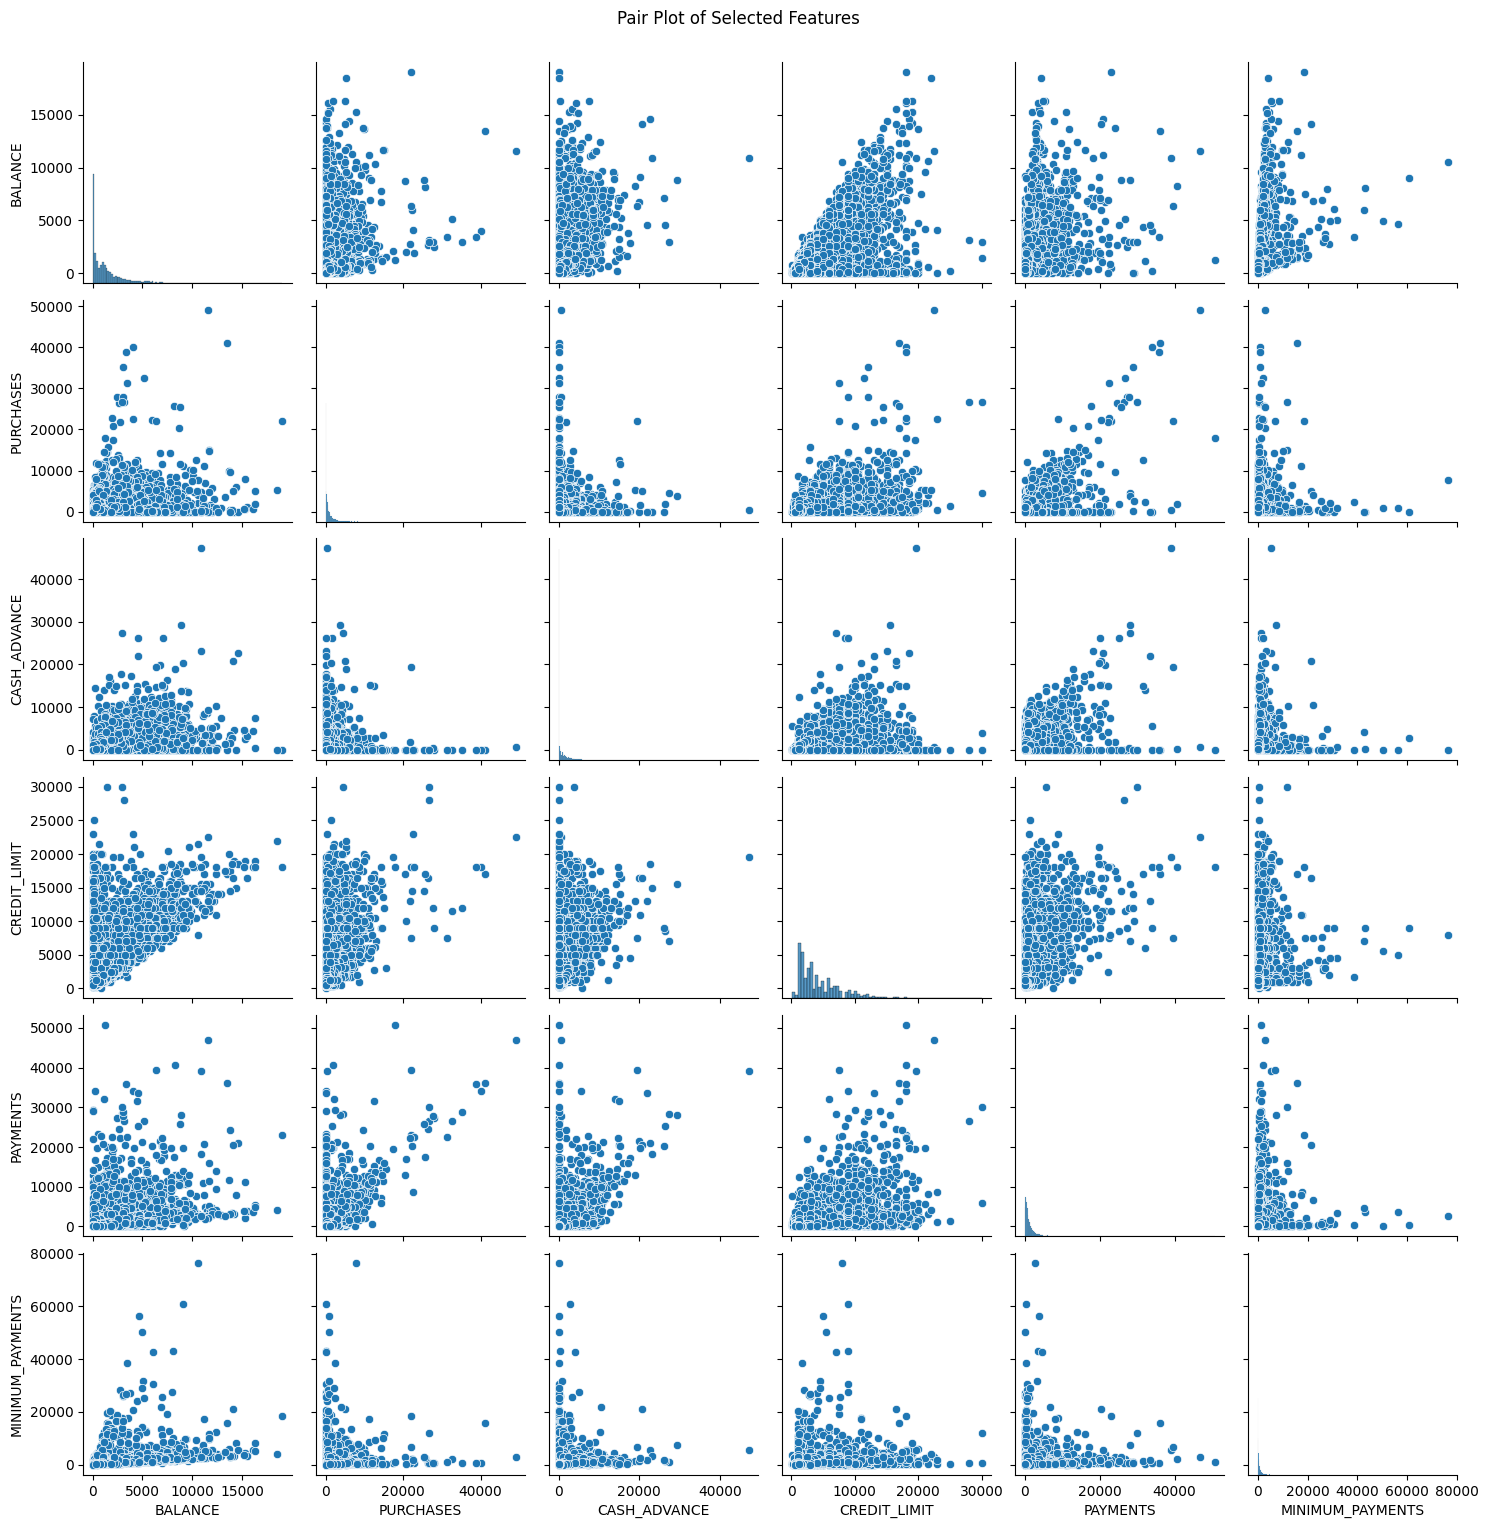

In [5]:
selected_features = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']
selected_data = df[selected_features]

# Pair plot for the selected features
sns.pairplot(selected_data)
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'BALANCE'),
  Text(1, 0, 'BALANCE_FREQUENCY'),
  Text(2, 0, 'PURCHASES'),
  Text(3, 0, 'ONEOFF_PURCHASES'),
  Text(4, 0, 'INSTALLMENTS_PURCHASES'),
  Text(5, 0, 'CASH_ADVANCE'),
  Text(6, 0, 'PURCHASES_FREQUENCY'),
  Text(7, 0, 'ONEOFF_PURCHASES_FREQUENCY'),
  Text(8, 0, 'PURCHASES_INSTALLMENTS_FREQUENCY'),
  Text(9, 0, 'CASH_ADVANCE_FREQUENCY'),
  Text(10, 0, 'CASH_ADVANCE_TRX'),
  Text(11, 0, 'PURCHASES_TRX'),
  Text(12, 0, 'CREDIT_LIMIT'),
  Text(13, 0, 'PAYMENTS'),
  Text(14, 0, 'MINIMUM_PAYMENTS'),
  Text(15, 0, 'PRC_FULL_PAYMENT'),
  Text(16, 0, 'TENURE')])

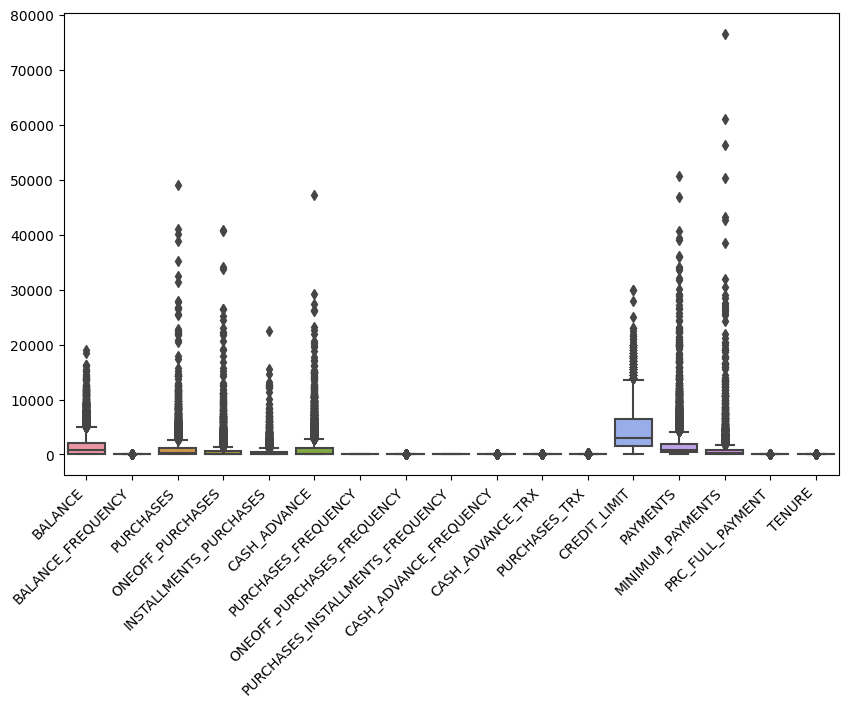

In [6]:
plt.figure(figsize=(10, 6)) 
sns.boxplot(data=df, orient="v")
plt.xticks(rotation=45, ha="right")


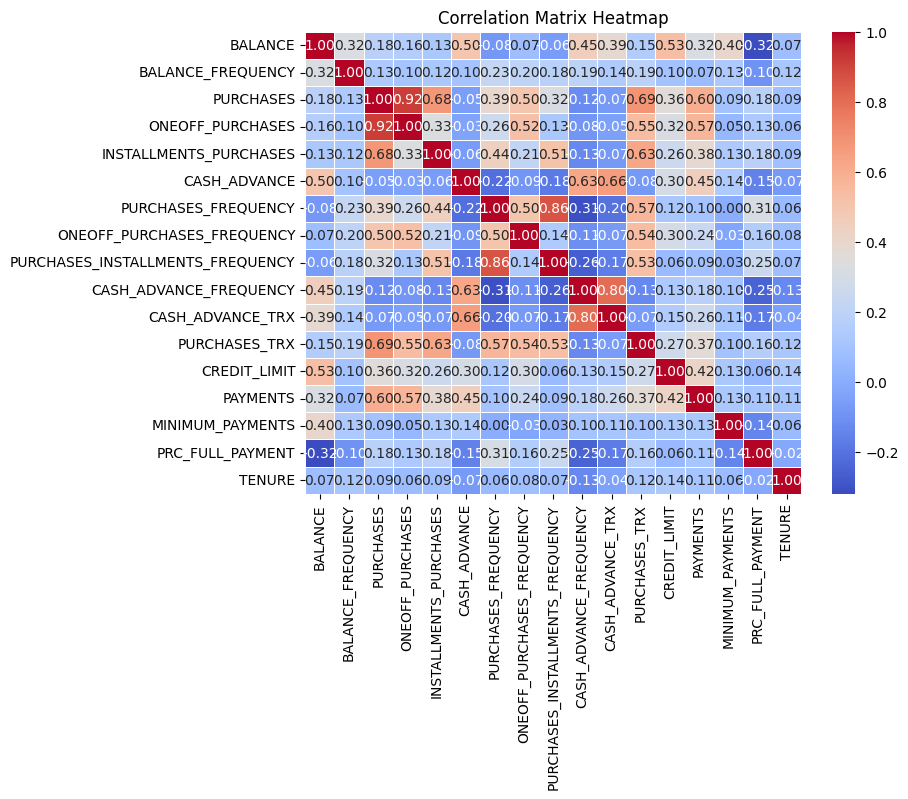

In [7]:
numeric_columns = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [8]:
df = df.dropna(axis=0)

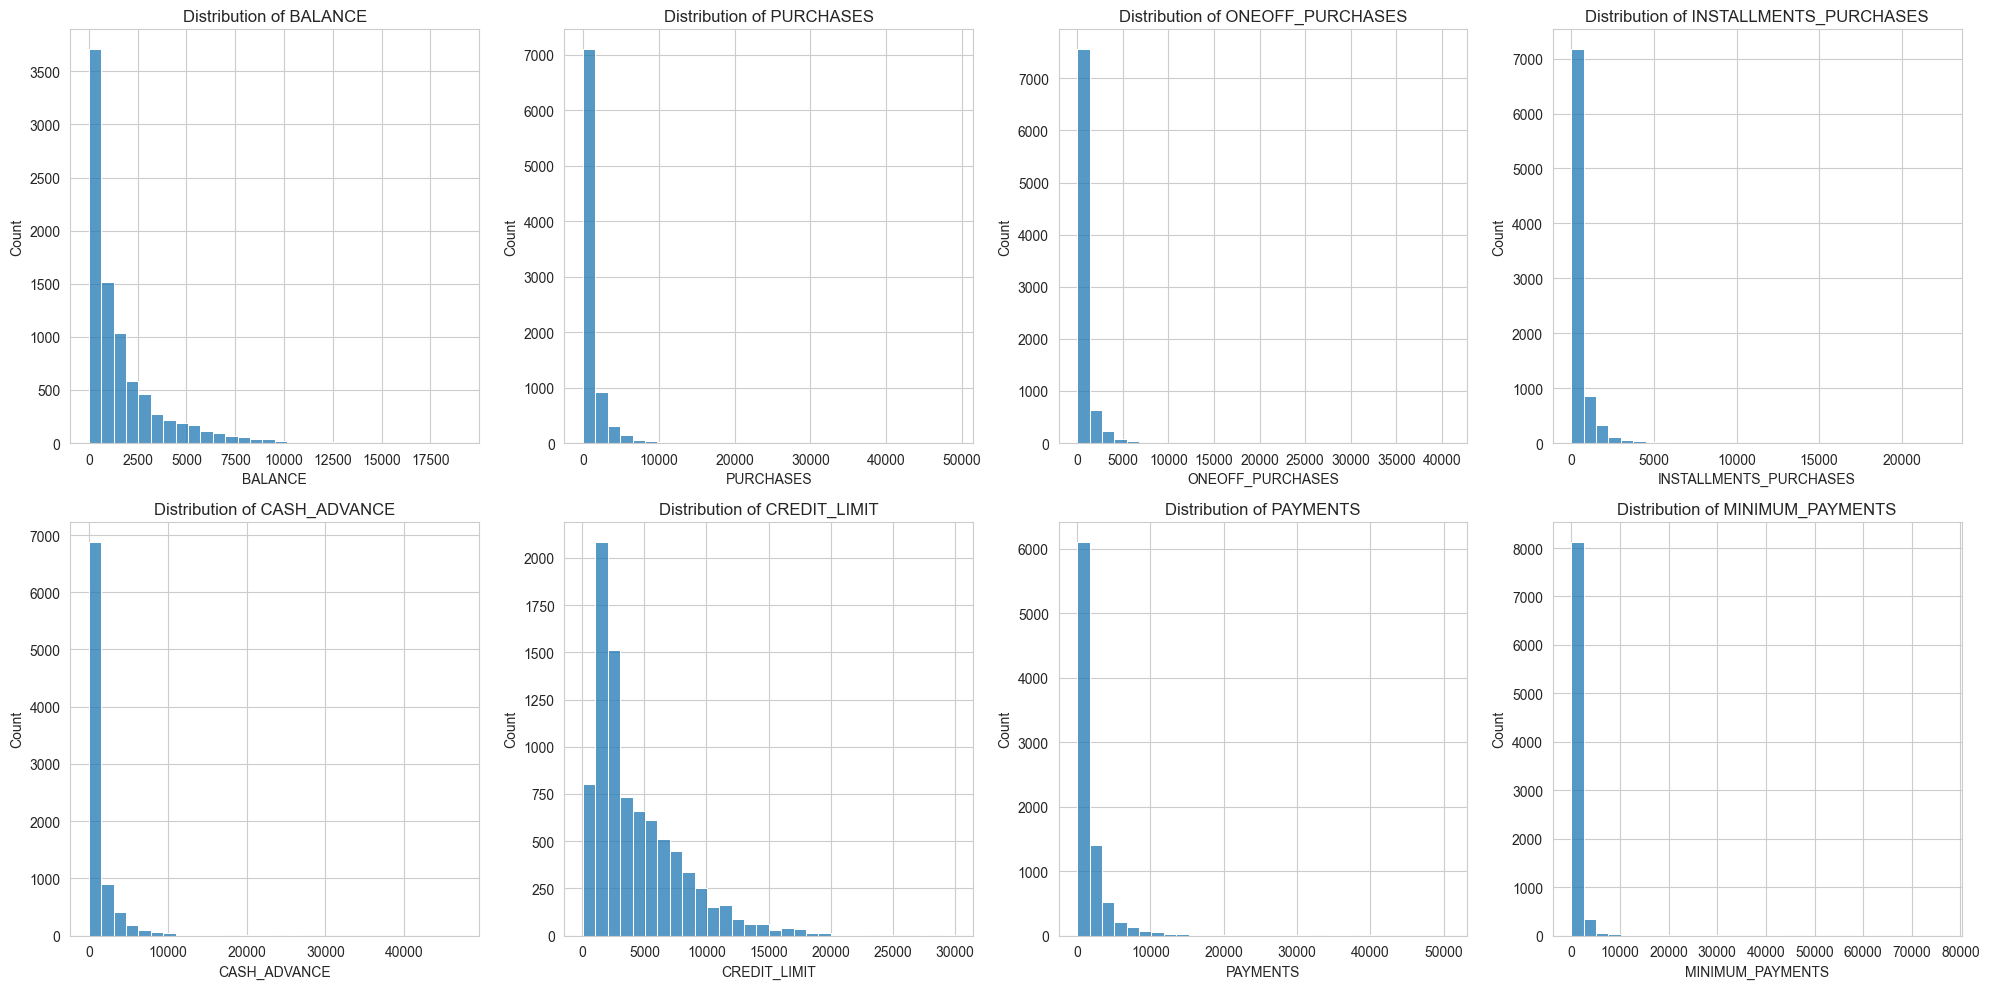

In [9]:
sns.set_style("whitegrid")

# Initialize the figure
plt.figure(figsize=(20, 10))

# Create a list of key variables to plot
key_variables = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']

# Create subplots for each key variable
for i, variable in enumerate(key_variables, 1):
    plt.subplot(2, 4, i)
    sns.histplot(df[variable], kde=False, bins=30)
    plt.title(f'Distribution of {variable}')

plt.tight_layout()
plt.show()

In [10]:
df.set_index('CUST_ID', inplace=True)

In [11]:
scaler = StandardScaler()
X= pd.DataFrame(scaler.fit_transform(df ), columns=df.columns)
X

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.744625,-0.370047,-0.429184,-0.359160,-0.354826,-0.468655,-0.820769,-0.686280,-0.717179,-0.681953,-0.479437,-0.517623,-0.962575,-0.543942,-0.305508,-0.537727,0.355181
1,0.764152,0.067679,-0.473208,-0.359160,-0.458839,2.568556,-1.236139,-0.686280,-0.926522,0.557022,0.099258,-0.597054,0.677204,0.796852,0.087689,0.212380,0.355181
2,0.426602,0.505405,-0.116413,0.099909,-0.458839,-0.468655,1.256077,2.646651,-0.926522,-0.681953,-0.479437,-0.120467,0.813852,-0.399503,-0.099906,-0.537727,0.355181
3,-0.373910,0.505405,-0.465825,-0.349660,-0.458839,-0.468655,-1.028455,-0.408536,-0.926522,-0.681953,-0.479437,-0.557339,-0.907916,-0.380165,-0.261131,-0.537727,0.355181
4,0.099551,0.505405,0.142062,-0.359160,0.994815,-0.468655,0.425339,-0.686280,0.538882,-0.681953,-0.479437,-0.279329,-0.743938,-0.132119,0.650363,-0.537727,0.355181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,-0.761342,-1.902089,-0.463563,-0.346751,-0.458839,-0.468655,-0.820769,-0.130790,-0.926522,-0.681953,-0.479437,-0.557339,-1.099224,-0.593143,-0.345988,-0.537727,-4.221800
8632,-0.750546,0.505405,-0.338865,-0.359160,-0.141436,-0.468655,1.256077,-0.686280,1.166912,-0.681953,-0.479437,-0.358760,-0.962575,-0.501396,-0.343706,1.150015,-4.221800
8633,-0.752977,-0.297095,-0.406572,-0.359160,-0.301402,-0.468655,0.840707,-0.686280,0.748227,-0.681953,-0.479437,-0.398476,-0.962575,-0.585367,-0.329572,0.306144,-4.221800
8634,-0.757721,-0.297095,-0.473208,-0.359160,-0.458839,-0.451422,-1.236139,-0.686280,-0.926522,0.144032,-0.190089,-0.597054,-1.099224,-0.595238,-0.340811,0.306144,-4.221800


## Data Preprocessing & Exploratory Data Analysis
After check the data there are 314 missing values which is less than 5% of the data set so I dropped all the missing values. Since clustering algorithms like K-means are sensitive to the scale of the data, we need to ensure all features are on the same scale.so I used StandardScaler to standardize the features.We could apply the PCA to reduce the dimensionality, but it will influence the model interpreability.

Some features exhibit a linear relationship, such as PURCHASES and PAYMENTS. This indicates that as one feature increases, the other tends to increase as well. There are no distinct clusters visible in the scatter plots of the feature pairs. However, there are concentrations of points in specific areas, indicating potential groupings. There are several outliers present in the data, especially visible in the distributions of CASH_ADVANCE, PAYMENTS, and MINIMUM_PAYMENTS.

In [12]:
from sklearn.metrics import silhouette_score

/Users/bonnyma/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/bonnyma/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/bonnyma/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/bonnyma/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

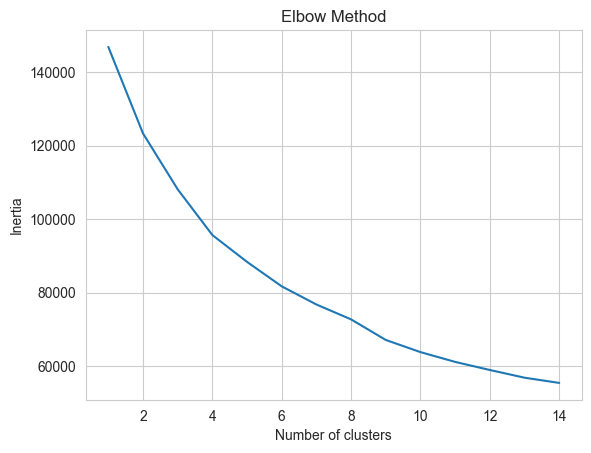

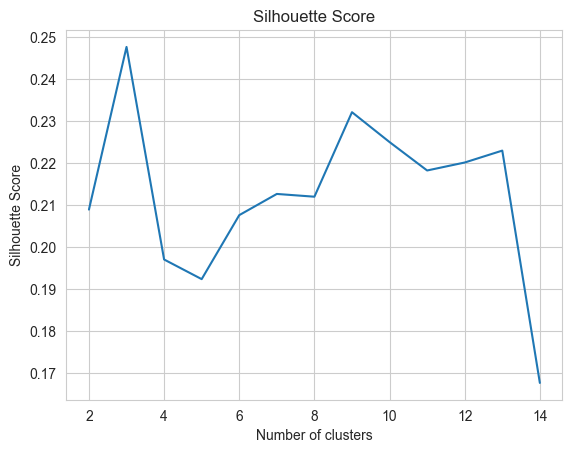

In [14]:
inertia = []
silhouette_avg = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    if i>1:
        silhouette_avg = silhouette_avg + [silhouette_score(X, labels)]

# Silhouette Score

plt.plot(range(1, 15), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


plt.plot(range(2, 15), silhouette_avg)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
K = 3
kmeans = KMeans(n_clusters=K, random_state=0).fit(X)

/Users/bonnyma/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans_sil_score = silhouette_score(X, labels)
print(f"K-Means Silhouette Score: {kmeans_sil_score}")

K-Means Silhouette Score: 0.22575868288204046


In [ ]:
centroids = kmeans.cluster_centers_
print(centroids)

[[-0.36980098 -0.17044319 -0.23352488 -0.20457684 -0.17604836 -0.31199758
  -0.05958495 -0.23363208 -0.04813876 -0.33599084 -0.30117379 -0.24510819
  -0.34298554 -0.28765999 -0.13965419  0.01561121 -0.02519338]
 [ 0.30332304  0.41987159  1.51168289  1.26371701  1.25122055 -0.24909419
   1.13337888  1.53916362  0.95735143 -0.36449691 -0.25460127  1.66768723
   0.88894685  0.82440776  0.15794244  0.47229807  0.29533849]
 [ 1.15191885  0.31393058 -0.29540954 -0.2118566  -0.30916994  1.36313684
  -0.65466082 -0.31629935 -0.56120484  1.5425362   1.32680929 -0.37283751
   0.59761138  0.44011841  0.40139768 -0.42448233 -0.13433865]]


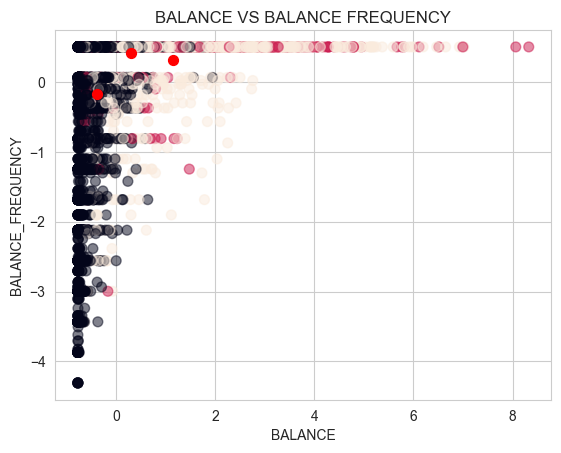

In [ ]:
plt.title('BALANCE VS BALANCE FREQUENCY')
plt.scatter(X['BALANCE'], X['BALANCE_FREQUENCY'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.xlabel('BALANCE')
plt.ylabel('BALANCE_FREQUENCY')
plt.show()

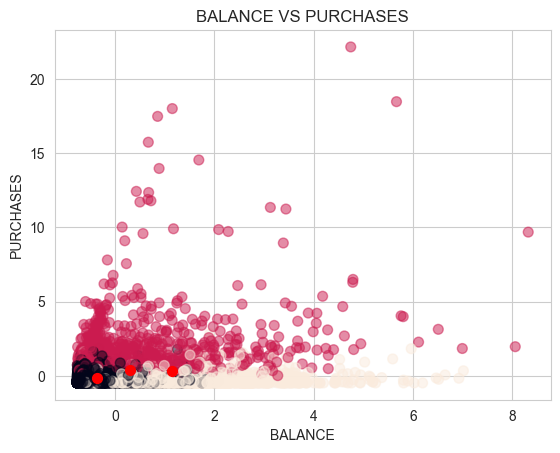

In [ ]:
plt.title('BALANCE VS PURCHASES')
plt.scatter(X['BALANCE'], X['PURCHASES'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.show()

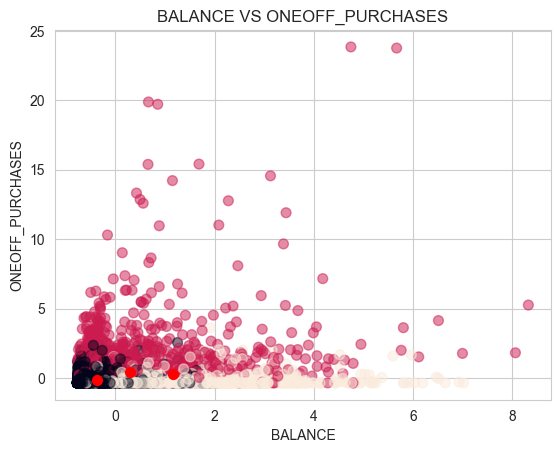

In [ ]:
plt.title('BALANCE VS ONEOFF_PURCHASES')
plt.scatter(X['BALANCE'], X['ONEOFF_PURCHASES'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.xlabel('BALANCE')
plt.ylabel('ONEOFF_PURCHASES')
plt.show()

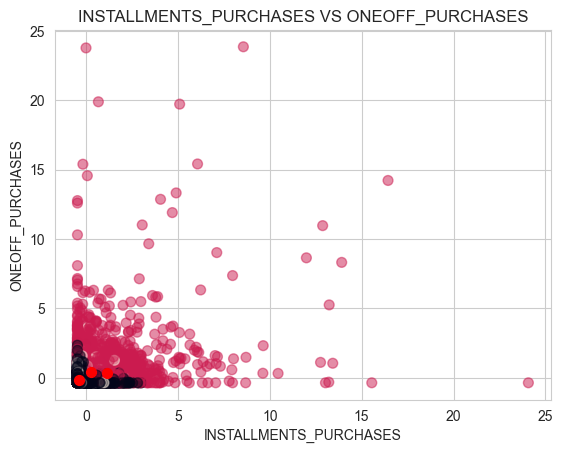

In [ ]:
plt.title('INSTALLMENTS_PURCHASES VS ONEOFF_PURCHASES')
plt.scatter(X['INSTALLMENTS_PURCHASES'], X['ONEOFF_PURCHASES'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.xlabel('INSTALLMENTS_PURCHASES')
plt.ylabel('ONEOFF_PURCHASES')
plt.show()

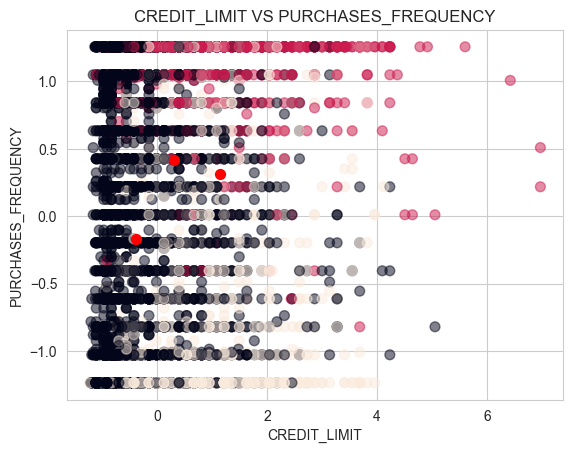

In [ ]:
plt.title('CREDIT_LIMIT VS PURCHASES_FREQUENCY')
plt.scatter(X['CREDIT_LIMIT'], X['PURCHASES_FREQUENCY'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.xlabel('CREDIT_LIMIT')
plt.ylabel('PURCHASES_FREQUENCY')
plt.show()

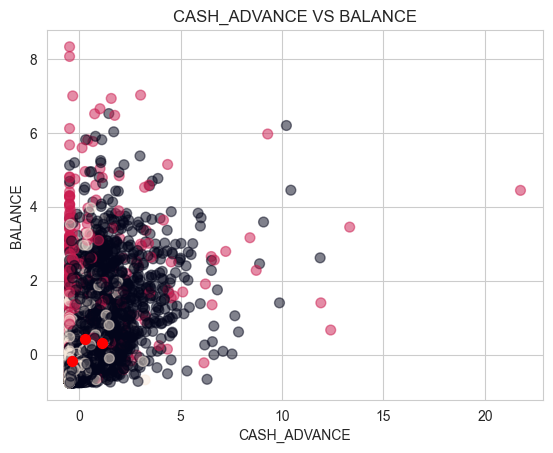

In [ ]:
plt.title('CASH_ADVANCE VS BALANCE')
plt.scatter(X['CASH_ADVANCE'], X['BALANCE'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.xlabel('CASH_ADVANCE')
plt.ylabel('BALANCE')
plt.show()

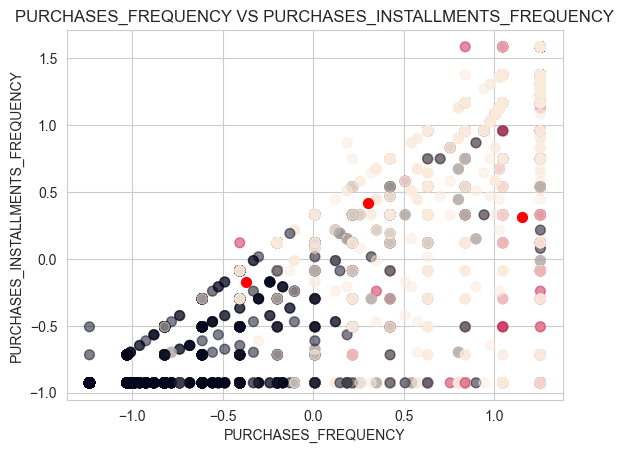

In [ ]:
plt.title( 'PURCHASES_FREQUENCY VS PURCHASES_INSTALLMENTS_FREQUENCY')
plt.scatter(X['PURCHASES_FREQUENCY'], X['PURCHASES_INSTALLMENTS_FREQUENCY'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.xlabel('PURCHASES_FREQUENCY')
plt.ylabel('PURCHASES_INSTALLMENTS_FREQUENCY')
plt.show()

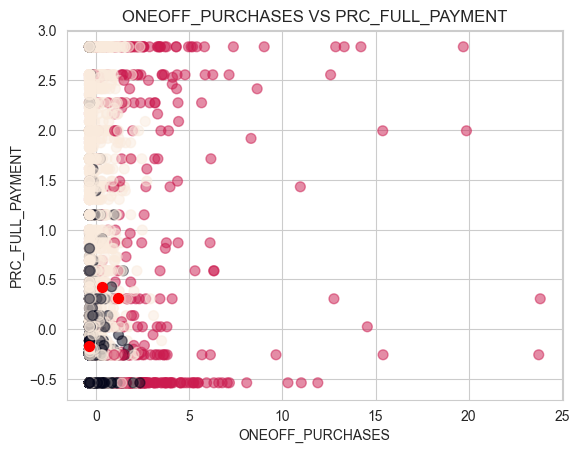

In [ ]:
plt.title( 'ONEOFF_PURCHASES VS PRC_FULL_PAYMENT')
plt.scatter(X['ONEOFF_PURCHASES'], X['PRC_FULL_PAYMENT'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.xlabel('ONEOFF_PURCHASES')
plt.ylabel('PRC_FULL_PAYMENT')
plt.show()

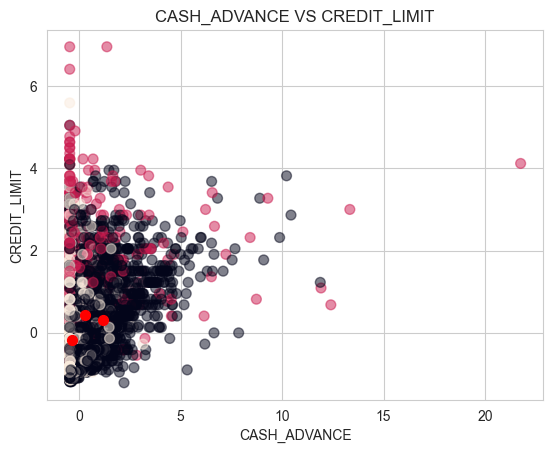

In [ ]:
plt.title('CASH_ADVANCE VS CREDIT_LIMIT')
plt.scatter(X['CASH_ADVANCE'], X['CREDIT_LIMIT'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.xlabel('CASH_ADVANCE')
plt.ylabel('CREDIT_LIMIT')
plt.show()

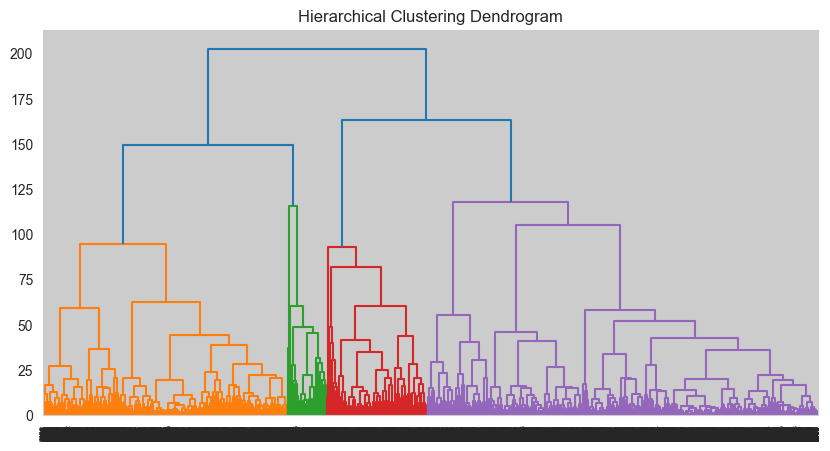

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate linkage matrix
Z = linkage(X, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

In [ ]:
from sklearn.cluster import AffinityPropagation

# Applying Affinity Propagation
af = AffinityPropagation(random_state=0)
af_labels = af.fit_predict(X)

# Silhouette Score
af_sil_score = silhouette_score(X, af_labels)
print(f"Affinity Propagation Silhouette Score: {af_sil_score}")


Affinity Propagation Silhouette Score: 0.1227732227867912


In [ ]:
centroids_af = af.cluster_centers_
print(centroids_af)

[[-9.04925746e-02 -2.12095447e+00 -2.87006813e-02 ... -6.08473253e-02
   5.87433482e-01  3.55180657e-01]
 [ 3.74671669e-01  5.05404648e-01  1.93457312e+00 ...  1.88502981e-01
  -2.56437677e-01  3.55180657e-01]
 [-3.77664678e-01 -9.64688149e-02 -4.73208191e-01 ... -2.88688283e-01
  -5.37726938e-01 -2.69614006e+00]
 ...
 [-7.43164608e-01  5.05404648e-01 -2.05254944e-01 ... -3.20680033e-01
   2.27517580e+00 -3.45897024e+00]
 [ 2.08368152e+00 -2.97094907e-01 -3.74199547e-01 ... -9.92669096e-04
  -5.37726938e-01 -4.22180042e+00]
 [-7.52977281e-01 -2.97094907e-01 -4.06571751e-01 ... -3.29572173e-01
   3.06144221e-01 -4.22180042e+00]]


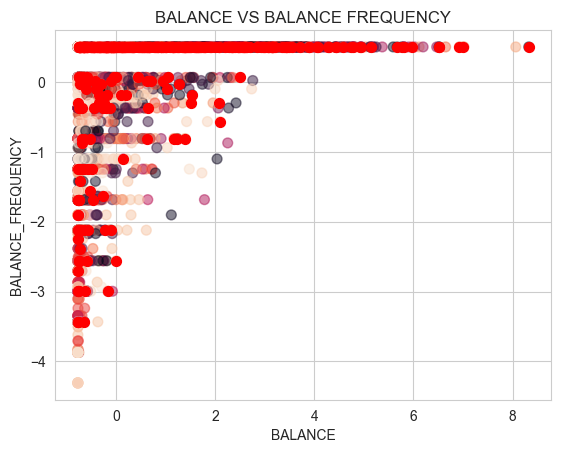

In [ ]:
plt.title('BALANCE VS BALANCE FREQUENCY')
plt.scatter(X['BALANCE'], X['BALANCE_FREQUENCY'], c= af.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids_af[:, 0], centroids_af[:, 1], c='red', s=50)
plt.xlabel('BALANCE')
plt.ylabel('BALANCE_FREQUENCY')
plt.show()

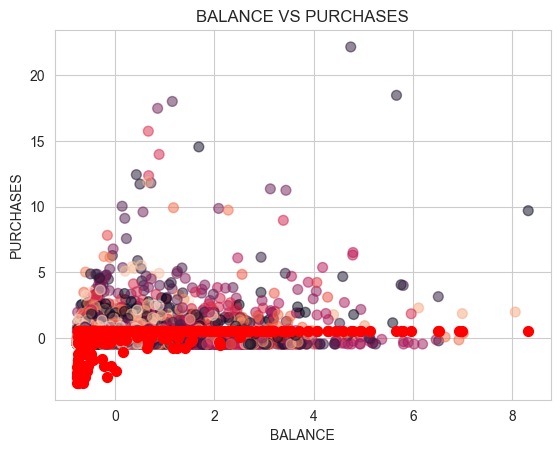

In [ ]:
plt.title('BALANCE VS PURCHASES')
plt.scatter(X['BALANCE'], X['PURCHASES'], c= af.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids_af[:, 0], centroids_af[:, 1], c='red', s=50)
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.show()

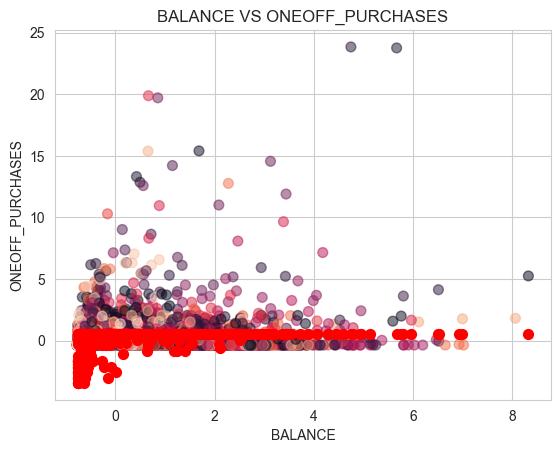

In [ ]:
plt.title('BALANCE VS ONEOFF_PURCHASES')
plt.scatter(X['BALANCE'], X['ONEOFF_PURCHASES'], c= af.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids_af[:, 0], centroids_af[:, 1], c='red', s=50)
plt.xlabel('BALANCE')
plt.ylabel('ONEOFF_PURCHASES')
plt.show()

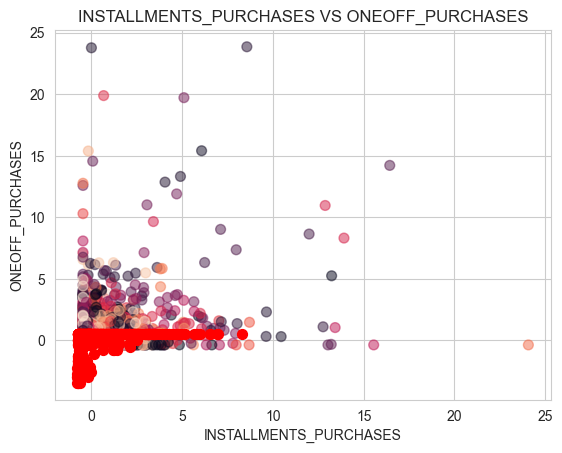

In [ ]:
plt.title('INSTALLMENTS_PURCHASES VS ONEOFF_PURCHASES')
plt.scatter(X['INSTALLMENTS_PURCHASES'], X['ONEOFF_PURCHASES'], c= af.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids_af[:, 0], centroids_af[:, 1], c='red', s=50)
plt.xlabel('INSTALLMENTS_PURCHASES')
plt.ylabel('ONEOFF_PURCHASES')
plt.show()

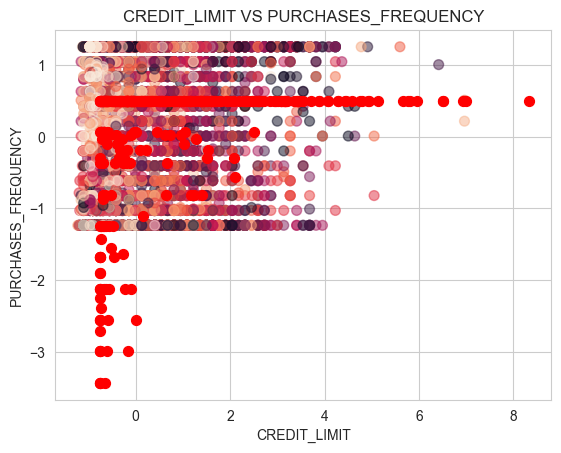

In [ ]:
plt.title('CREDIT_LIMIT VS PURCHASES_FREQUENCY')
plt.scatter(X['CREDIT_LIMIT'], X['PURCHASES_FREQUENCY'], c= af.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids_af[:, 0], centroids_af[:, 1], c='red', s=50)
plt.xlabel('CREDIT_LIMIT')
plt.ylabel('PURCHASES_FREQUENCY')
plt.show()

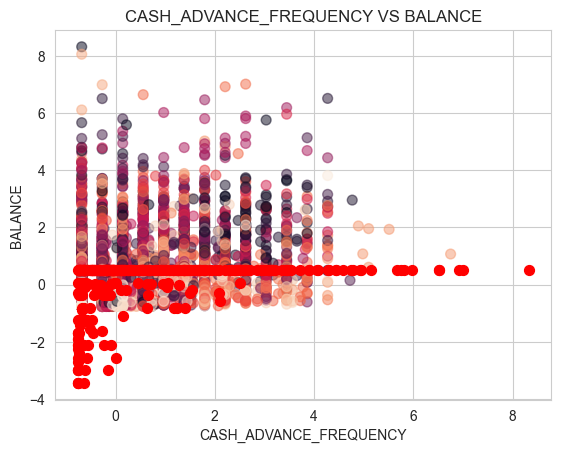

In [ ]:
plt.title('CASH_ADVANCE_FREQUENCY VS BALANCE')
plt.scatter(X['CASH_ADVANCE_FREQUENCY'], X['BALANCE'], c= af.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids_af[:, 0], centroids_af[:, 1], c='red', s=50)
plt.xlabel('CASH_ADVANCE_FREQUENCY')
plt.ylabel('BALANCE')
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

# Applying DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Silhouette Score
# Note: DBSCAN can result in noise data point with label -1
# Only include points that are part of a cluster
if len(set(dbscan_labels)) > 1:
    dbscan_sil_score = silhouette_score(X, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {dbscan_sil_score}")


DBSCAN Silhouette Score: -0.465117752115066


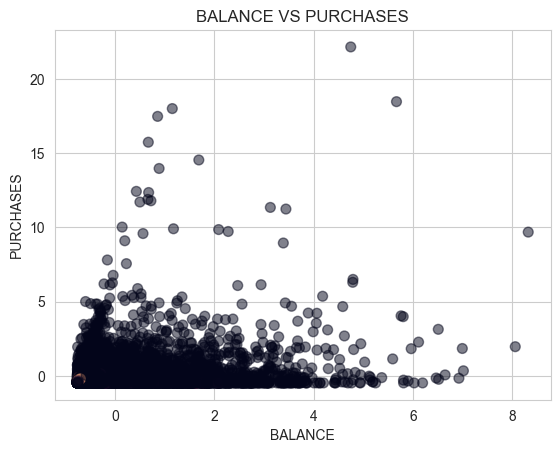

In [ ]:
plt.title('BALANCE VS PURCHASES')
plt.scatter(X['BALANCE'], X['PURCHASES'], c=dbscan.labels_.astype(float), s=50, alpha=0.5)
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.show()

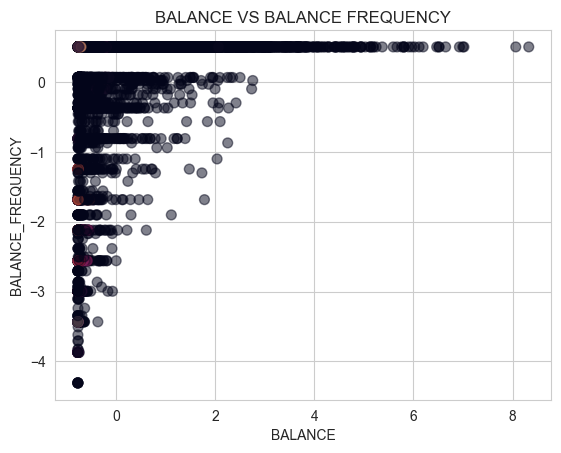

In [ ]:
plt.title('BALANCE VS BALANCE FREQUENCY')
plt.scatter(X['BALANCE'], X['BALANCE_FREQUENCY'], c=dbscan.labels_.astype(float), s=50, alpha=0.5)
plt.xlabel('BALANCE')
plt.ylabel('BALANCE_FREQUENCY')
plt.show()

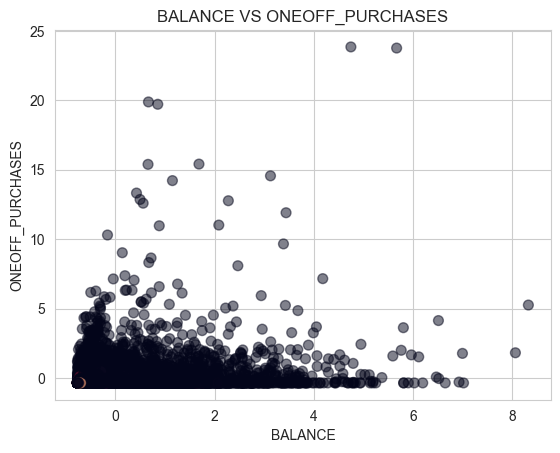

In [ ]:
plt.title('BALANCE VS ONEOFF_PURCHASES')
plt.scatter(X['BALANCE'], X['ONEOFF_PURCHASES'], c= dbscan.labels_.astype(float), s=50, alpha=0.5)
plt.xlabel('BALANCE')
plt.ylabel('ONEOFF_PURCHASES')
plt.show()

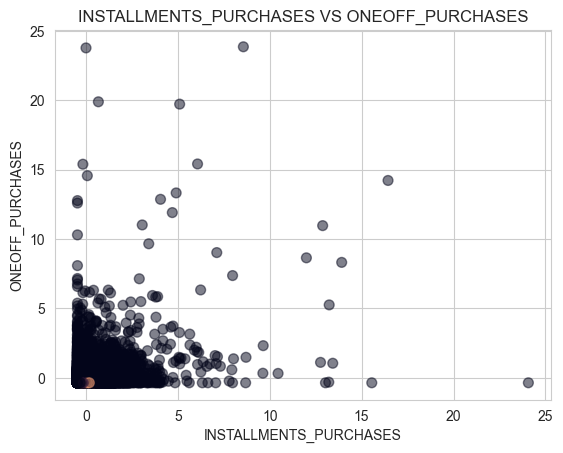

In [ ]:
plt.title('INSTALLMENTS_PURCHASES VS ONEOFF_PURCHASES')
plt.scatter(X['INSTALLMENTS_PURCHASES'], X['ONEOFF_PURCHASES'], c= dbscan.labels_.astype(float), s=50, alpha=0.5)
plt.xlabel('INSTALLMENTS_PURCHASES')
plt.ylabel('ONEOFF_PURCHASES')
plt.show()

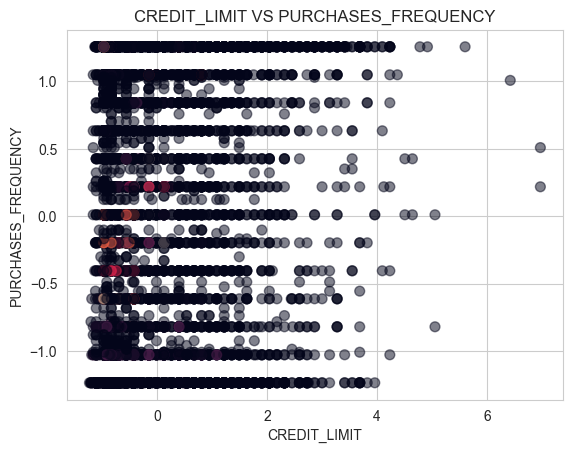

In [ ]:
plt.title('CREDIT_LIMIT VS PURCHASES_FREQUENCY')
plt.scatter(X['CREDIT_LIMIT'], X['PURCHASES_FREQUENCY'], c= dbscan.labels_.astype(float), s=50, alpha=0.5)
plt.xlabel('CREDIT_LIMIT')
plt.ylabel('PURCHASES_FREQUENCY')
plt.show()

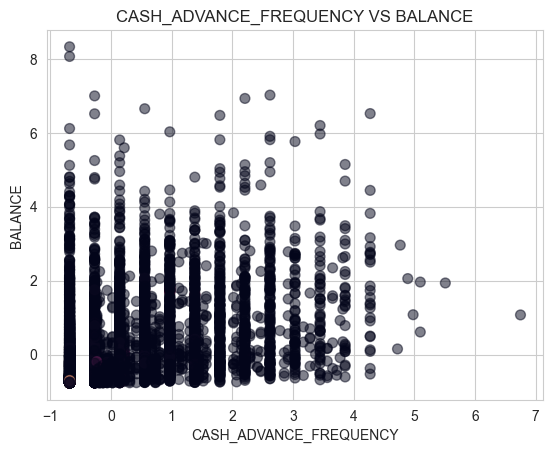

In [ ]:
plt.title('CASH_ADVANCE_FREQUENCY VS BALANCE')
plt.scatter(X['CASH_ADVANCE_FREQUENCY'], X['BALANCE'], c= dbscan.labels_.astype(float), s=50, alpha=0.5)
plt.xlabel('CASH_ADVANCE_FREQUENCY')
plt.ylabel('BALANCE')
plt.show()

## Clustering Algorithms 
Both the Elbow Method and the silhouette scores for K-Means clustering suggest that k=3, with a silhouette score of 0.2258, which is the highest among the three cluster methods. This indicates that the data points are on or very close to the decision boundary between two neighboring clusters.

In contrast, the Hierarchical clustering method has a silhouette score of 0.1228, suggesting that there may be some degree of separation between clusters, but they may not be well-defined, and there could be some overlap between them.

DBSCAN, on the other hand, has a negative silhouette score of -0.4651, indicating that data points are closer to neighboring clusters than to their own cluster. This suggests the presence of many outliers or noise in the data, as DBSCAN labels sparse points as outliers.

Furthermore, when examining the scatter plots generated by DBSCAN and Hierarchical clustering, it becomes apparent that finding clear borders for each cluster is challenging. Therefore, it is advisable to choose the K-Means clustering algorithm for implementation


## Interpreting Clusters
According to the K-Means cluster scatterplot the white cluster tends to have 
- high balance,
- low purchase, 
- low ONEOFFPURCHASES, 
- very rare intallment purchas, 
- stable balance frequency,
- relatively high cash advance

The black cluster:
- low balance,
- low purchase,
- low ONEOFFPURCHASES,
- low credit limit,
- low installment purchase

The red cluster:
- stable balance frequency,
- high purchase,
- high ONEOFFPURCHASES,
- high installment purchase,
- low cash advance


## Actionable Insights

#### White Cluster (High Balance, Low Purchase, Low ONEOFFPURCHASES, Rare Installment Purchases, Stable Balance Frequency, Relatively High Cash Advance):

Credit Card Upgrades: Since customers in this cluster tend to have high balances and use cash advances, consider offering them premium credit card options with higher credit limits and lower cash advance fees. Highlight the benefits of these cards, such as travel rewards or cashback on cash advances.

Cash Advance Promotions: Create targeted cash advance promotions or cashback offers to incentivize these customers to use their credit cards for cash advances. Ensure that the terms and fees associated with cash advances are clear and competitive.

Financial Planning Tools: Offer financial planning tools and resources to help customers manage their high balances more effectively. Provide tips on how to reduce reliance on cash advances and make more informed financial decisions.

#### Black Cluster (Low Balance, Low Purchase, Low ONEOFFPURCHASES, Low Credit Limit, Low Installment Purchase):

Credit Building Programs: Since customers in this cluster have low balances and credit limits, consider offering credit-building programs or secured credit cards. These programs can help customers improve their creditworthiness over time.

Targeted Savings and Budgeting Tools: Provide tools and resources to help customers in this cluster save and budget more effectively. Encourage them to set financial goals and provide tips on how to make the most of their limited credit.

Low-Cost Credit Card Options: Offer credit cards with low annual fees and competitive interest rates to attract customers who are budget-conscious. Highlight the affordability and simplicity of these cards.

#### Red Cluster (Stable Balance Frequency, High Purchase, High ONEOFFPURCHASES, High Installment Purchase, Low Cash Advance):

Rewards and Loyalty Programs: Create rewards and loyalty programs that cater to the spending habits of customers in this cluster. Offer cashback, discounts, or exclusive perks for frequent shoppers.

Targeted Promotions: Customize promotions based on their high purchase and one-off purchase behaviors. Send personalized offers for products or services they are likely to be interested in.

Credit Limit Increases: Monitor the credit behavior of customers in this cluster and proactively offer credit limit increases to accommodate their higher spending patterns. This can enhance their loyalty to your brand.